In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *
import seaborn as sns

In [28]:
df = pd.read_csv('iris.data', names=['sl', 'sw', 'pl', 'pw', 'class'], index_col=False)


Y = LabelEncoder().fit_transform(df['class'])
Y = to_categorical(Y)
print(Y)

X = df.drop('class', axis=1)
X.head()

X_train = X[:-5]
X_test = X[-5:]

Y_train = Y[:-5]
Y_test = Y[-5:]


[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0.

In [22]:
model = Sequential()
model.add(Dense(256, input_shape=(4,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

hist = model.fit(X_train, Y_train, epochs=100, validation_split=0.1)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 256)               1280      
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 32)                4128      
                                                                 
 dense_11 (Dense)            (None, 3)                 99        
                                                                 
Total params: 38,403
Trainable params: 38,403
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
5/5 [==============================] - 2s 73ms/step - loss: 1.1750 - acc: 0.3000 - val_loss: 1.0410 - val_acc: 0.0000e+00
Epoch 2/100
5/5 [==============================]

Epoch 56/100
5/5 [==============================] - 0s 13ms/step - loss: 0.1095 - acc: 0.9538 - val_loss: 0.1229 - val_acc: 1.0000
Epoch 57/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0803 - acc: 0.9538 - val_loss: 0.5651 - val_acc: 0.6667
Epoch 58/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0894 - acc: 0.9538 - val_loss: 0.1818 - val_acc: 0.9333
Epoch 59/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0781 - acc: 0.9769 - val_loss: 0.0840 - val_acc: 1.0000
Epoch 60/100
5/5 [==============================] - 0s 15ms/step - loss: 0.0868 - acc: 0.9769 - val_loss: 0.1608 - val_acc: 0.9333
Epoch 61/100
5/5 [==============================] - 0s 17ms/step - loss: 0.0718 - acc: 0.9769 - val_loss: 0.3207 - val_acc: 0.8000
Epoch 62/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0724 - acc: 0.9692 - val_loss: 0.2023 - val_acc: 0.8667
Epoch 63/100
5/5 [==============================] - 0s 12ms/step - loss: 0.0706 - a

Text(0.5, 1.0, 'acc')

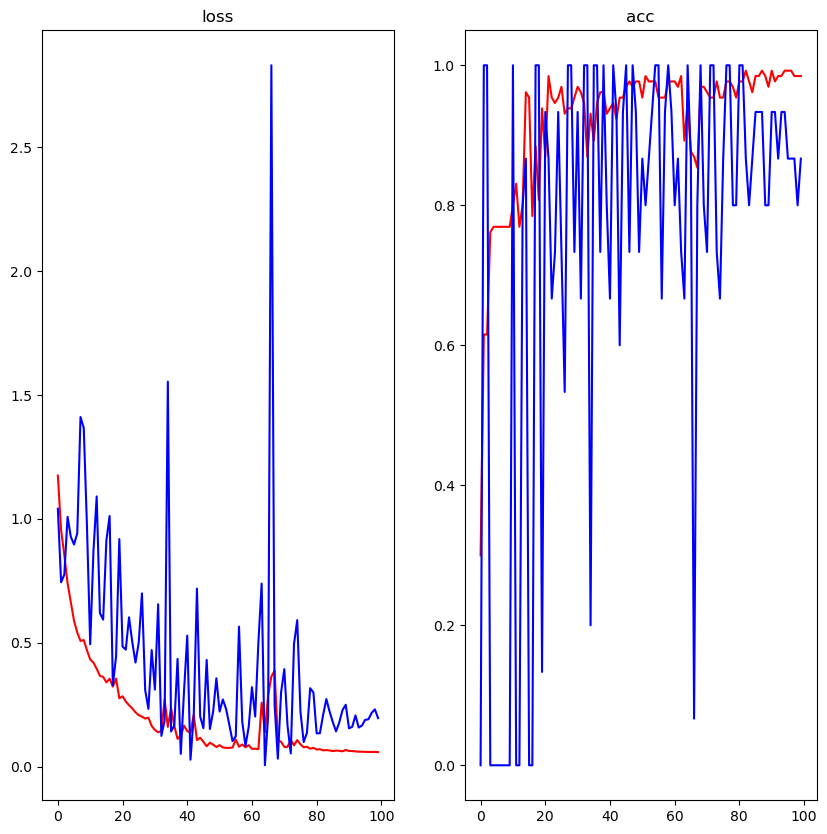

In [23]:

plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'], color='r')
plt.plot(hist.history['val_loss'], color='b')
plt.title('loss')

plt.subplot(1,2,2)
plt.plot(hist.history['acc'], color='r')
plt.plot(hist.history['val_acc'], color='b')
plt.title('acc')


In [26]:
score = model.evaluate(X_test, Y_test)

pred = model.predict(X_test)
print(pred)
print(Y_test)

# print(score)

1/1 [==============================] - 0s 16ms/step
[[5.5029949e-07 4.1604467e-02 9.5839500e-01]
 [1.2772696e-06 4.9562369e-02 9.5043629e-01]
 [2.3912689e-06 1.2398074e-01 8.7601686e-01]
 [1.5624683e-07 9.5541803e-03 9.9044561e-01]
 [3.1661789e-06 8.5274205e-02 9.1472256e-01]]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
